# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털 https://kosis.kr/index/index.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래액
- 합계등을 제외하고 선택(전기전자통신 2020년전후로 분리되어서 미리 합침)
- 행렬을 전환
<div style="display:flex">
    <img style="padding:10px" src="attachment:33e1e4c8-332d-42ca-907b-008ee328f08b.png" width=180>
    <img style="padding:10px" src="attachment:581a4d47-326b-4b95-84e5-863e94fe7e7b.png" width=180>
</div>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [2]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [3]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # utf-8
ori.columns = ['category','date','internet','mobile']
ori.head()
# ori.tail()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053


In [4]:
print("====수정 전====")
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x:x.strip(' p)'))
print("====수정 후====")
print(ori['date'].tail())

====수정 전====
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
====수정 후====
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [5]:
ori['date'] = pd.to_datetime(ori["date"], format='%Y.%m')
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [6]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category']== '음식서비스' ]
obj = ['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
1644,여행 및 교통서비스,2018-01-01,685630,805804
1125,음·식료품,2022-10-01,560689,1598920
1714,여행 및 교통서비스,2023-11-01,664179,1369969
1681,여행 및 교통서비스,2021-02-01,117466,452203
436,의복,2021-05-01,356514,1048361


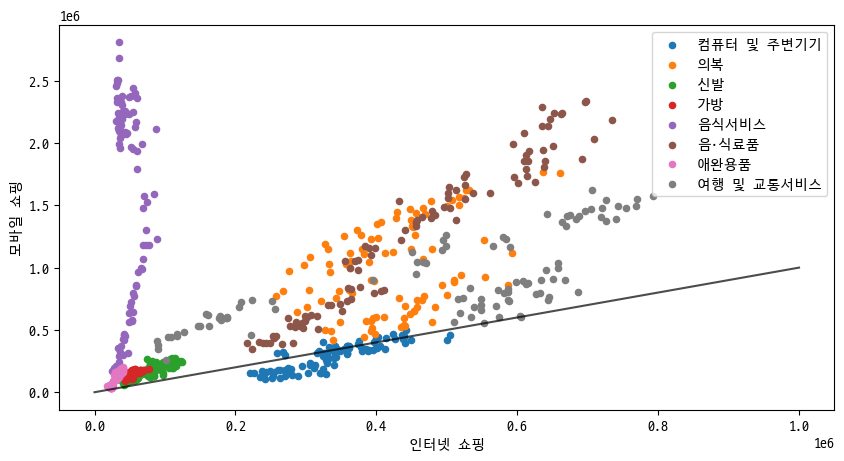

In [7]:
fig , ax = plt.subplots(figsize=(10,5))

category = obj # ['컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter( x_data , y_data, s = 20, label = cate )

ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000],[0,1000000],'k-',alpha=0.7)
plt.show()

### 선색
- 'k': 검은색 (black)을 의미합니다. Matplotlib에서는 여러 가지 색을 한 글자로 나타낼 수 있습니다.
- 'b': 파란색 (blue)
- 'g': 녹색 (green)
- 'r': 빨간색 (red)
- 'c': 청록색 (cyan)
- 'm': 자홍색 (magenta)
- 'y': 노란색 (yellow)
- 'k': 검은색 (black)
- 'w': 흰색 (white)
### 선종류
- '-': 실선 (solid line)을 의미합니다. 선 스타일에는 다양한 종류가 있습니다.
- '-': 실선 (solid line)
- '--': 파선 (dashed line)
- '-.': 점선-파선 혼합 (dash-dot line)
- ':': 점선 (dotted line)

In [ ]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category']== '음식서비스' ]
obj = ['가전·전자·통신기기','가구','서적','패션용품 및 액세서리','스포츠·레저용품','아동·유아용품','농축수산물','생활용품','애완용품','여행 및 교통서비스','문화 및 레저서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)